<a href="https://colab.research.google.com/github/Thorugoh/autoencoders/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.datasets.mnist import load_data

In [12]:
(trainX, trainy), (testX, testy) = load_data()

In [13]:
trainX = torch.from_numpy(trainX).type(torch.float)
trainX = trainX.reshape(trainX.shape[0], 28*28)
trainX = trainX - 127.5
trainX = trainX / 127.5

testX = torch.from_numpy(testX).type(torch.float)
testX = testX.reshape(testX.shape[0], 28*28)
testX = testX - 127.5
testX = testX / 127.5

In [14]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_dim, hidden_dim, out_dim):
    super(NeuralNetwork, self).__init__()

    self.network = nn.Sequential(nn.Linear(in_dim, hidden_dim),
                                 nn.Tanh(),
                                 nn.Linear(hidden_dim, out_dim),
                                 nn.Tanh())

  def forward(self, x):
    return self.network(x)

In [15]:
encoder = NeuralNetwork(28 * 28, 200, 200)
decoder = NeuralNetwork(200, 200, 28 * 28)

In [16]:
def sample_batch(batch_size):
  idx = torch.randperm(trainX.shape[0])[:batch_size]
  return trainX[idx]

In [17]:
def train(encoder, decoder, encoder_optmizer, decoder_optimizer, nb_epochs=1000, batch_size=128, device='cpu'):
  training_loss = []
  for epoch in tqdm(range(nb_epochs)):
    img_batch = sample_batch(batch_size).to(device)
    z = encoder(img_batch)
    reconstructed_img = decoder(z)

    loss = ((img_batch - reconstructed_img)**2).mean()

    encoder_optmizer.zero_grad()
    decoder_optimizer.zero_grad()
    loss.backward()
    encoder_optmizer.step()
    decoder_optimizer.step()

    training_loss.append(loss.item())

  return training_loss


In [18]:
encoder = NeuralNetwork(28 * 28, 200, 200)
decoder = NeuralNetwork(200, 200, 28 * 28)

device = 'cuda'
encoder = encoder.to(device)
decoder = decoder.to(device)

In [19]:
encoder_optmizer = torch.optim.Adam(encoder.parameters(), lr=1e-4)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=1e-4)

In [20]:
training_loss = train(encoder, decoder, encoder_optmizer,
                      decoder_optimizer, nb_epochs=10000,
                      batch_size=128, device=device)

100%|██████████| 10000/10000 [00:37<00:00, 268.88it/s]


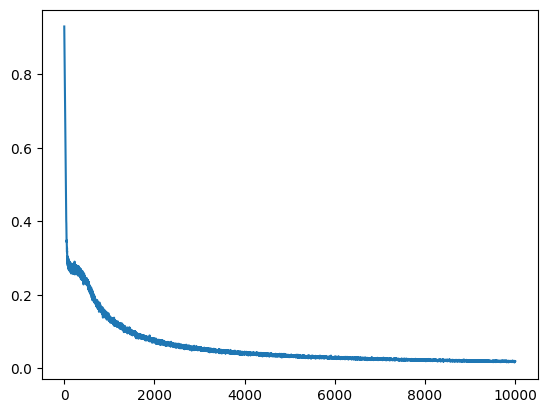

In [21]:
plt.plot(training_loss)

In [22]:
img = sample_batch(1).to(device)
z = encoder(img)
reconstructed_data = decoder(z)

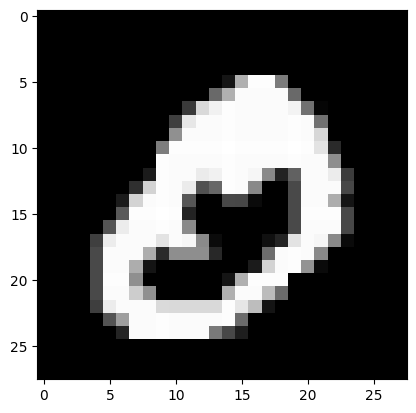

In [23]:
plt.imshow(img.cpu().data.numpy().reshape(28, 28), cmap='gray')

In [24]:
z

tensor([[-5.9260e-01, -7.9891e-01,  7.6009e-01,  2.6648e-01,  2.6109e-01,
          2.0717e-01, -7.5119e-01, -1.9020e-01,  7.6322e-01,  5.3463e-01,
         -2.0668e-01,  3.6858e-01,  6.4952e-01,  5.0660e-01,  8.3078e-02,
         -3.5123e-01,  4.8352e-01,  3.7267e-01, -5.0407e-01,  1.8828e-01,
         -6.6864e-01,  6.5808e-01, -6.2622e-01,  2.8393e-01, -8.0238e-01,
          5.4387e-01,  3.3765e-01,  1.9528e-01, -4.6923e-01,  7.6117e-01,
          7.0910e-03,  4.5833e-01,  8.4861e-01, -2.6749e-01, -5.1083e-01,
          9.5013e-02, -3.0793e-01,  5.7578e-01,  6.6942e-01, -1.0358e-02,
         -4.3827e-01, -1.7701e-01, -1.7529e-01, -1.0662e-01, -8.3138e-02,
         -7.9410e-02,  5.0239e-01, -2.4110e-01,  1.5164e-01,  2.0581e-01,
          1.1343e-02,  4.1258e-01,  1.5646e-01,  5.5155e-01,  7.0315e-01,
         -8.6469e-01,  4.7714e-01,  4.1954e-01, -4.4885e-01,  7.3718e-01,
         -3.1149e-01,  7.2358e-01, -1.5096e-01, -2.9542e-01,  7.8896e-01,
          5.4885e-01,  2.9810e-01, -5.

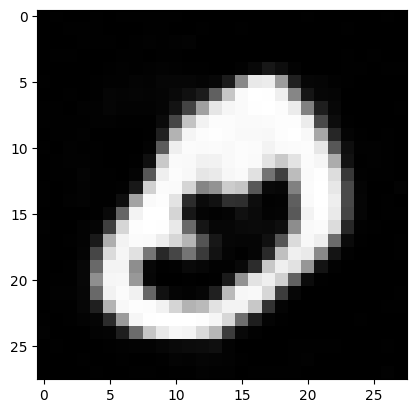

In [25]:
plt.imshow(reconstructed_data.cpu().data.numpy().reshape(28, 28), cmap='gray')